<a href="https://colab.research.google.com/github/ganeshutah/Jove/blob/master/For_CS3100_Fall2024/06_RE/ASSIGNMENT-3/uABCDEFG_asg03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# If you want to clear outputs for a "fresh look", go to Edit and hit "clear outputs"
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True

if OWN_INSTALL:

  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',
                   '../../../..',  '../../../../3rdparty',
                   '../../..',     '../../../3rdparty',
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --

from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa

from jove.Def_NFA import *
from jove.Def_RE2NFA import *
from jove.Def_NFA2RE import * #-- to check Even010 via RE and NFA
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

---------------------
---------------------

#### This assignment has a simple-to-state goal:
* Design a minimal DFA for the language
 $ Pattern_{010} =   ( \;\; \overline {\{0,1\}^* \; \{010\}\; \{0,1\}^* }\;\; (010) \;\; \overline {\{0,1\}^* \{010\}\{0,1\}^*} \;\; (010)\;\; )^*  $

---------------------
---------------------

#### $Pattern_{010}$ is the language of repeating blocks of 010, where each such block is preceded by any string from a language where 010 does not occur.

* Observe that there is no regular expression (RE) that directly captures $Pattern_{010}$.
* Your goal is to obtain that RE (which, for us, allows only union, concatenation and star) using the functions you'll be learning across the chapters
* Specifically, you'll be using these functions (and only these). You may **not design** any NFA or DFA from scratch using md2mc:

  - re2nfa
  - nfa2dfa
  - dfa2nfa
  - min_dfa or min_dfa_brz
  - mk_gnfa
  - del_gnfa_states which is to convert NFA to RE
  - comp_dfa

* Approach:
  - Obtain RE for the constituents of $Pattern_{010}$. Use only the above operations.
  - Name each constituent clearly - such as RE_first_block, RE_first_block_complement, etc.
     - RE_first_block = ...
     - RE_another_purpose = ...
  - Once all the REs are in place, use Python's String concatenation to form an RE for the whole $Pattern_{010}$.
    - Example: Pattern_010_RE = "(" + RE_First_Block + ... + ")"

* Then work on Pattern_010_RE to get the final answer DFA, the minimal DFA for it, _calling it_ **Pattern_010_Min_DFA**

* Document each step using a preceding text-box with a few lines of code

* I am leaving some space for you to simulate  **Pattern_010_Min_DFA**   on some "must accept" strings and "must reject" strings.

* You are to come up with a few additional test-strings also (at least two per class).

* **Much like in programming, debug each part thoroughly** but in a way specific to Jove. Here is a specific suggestion:
  - Suppose you think of only the first part of the repetition
  - i.e. Half_Pat =  $( \;\; \overline { \{0,1\}^* \; \{010\}\; \{0,1\}^* } \;\;\; (010) \;\; )^*  $,
  - then does the intersection of the DFA for Half_Pat and Pattern_010_RE make sense?  Does it help you check your work? Please do this and note down your observations.
  
#### There will be about 8-12 step depending on your approach. Some steps will take more work (such as del_gnfa_states). Those will have higher point-values. The exact number of steps will not be a criterion for grading, but rather how you document your steps.

#### **In your coding, you'll be using del_gnfa_states**. In that function, an array called DO[..] is used. Please list the contents of the array one-by-one. E.g. evaluate DO[0], then DO[1], etc, all the way to DO[size-1-of-DO] where size-1-of-DO is the DO size minus one.  The size-1-of-DO will be either the number of states of the starting NFA or maybe +/- 1 (please find out).

#### I'm asking you to evaluate DO[0], DO[1] etc in separate cells mainly to document the steps of the NFA to RE conversion that we will be studying in class. I.e. the final RE you need for your work does not need these intermediate arrays.

####  If there are repeating parts of a language (e.g. the complemented part) you should compute its RE only once and use it again.

#### **The final minimal DFA Pattern_010_Min_DFA will have exactly 28 states.** If you get this result, you should feel very good -- this is because minimal DFA are unique. Still you must document all intermediate steps to earn your points.

-------

##*What to submit*

### Please read Piazza note @121 that clarifies what to submit.

### Specifically:

#### * Download the ipynb
#### * Run all the tests and then File->Print to obtain a PDF
#### * Submit both the .ipynb and .pdf files


---------------------
---------------------

In [38]:
#  Goal: RE_First_Block
RE_under_comp = '(0+1)* 010 (0+1)*'
NFA_First_Block = re2nfa(RE_under_comp)

In [39]:
DFA_First_Block = nfa2dfa(NFA_First_Block)

In [40]:
# ... Fill the remaining cells ...

### There will be many steps. Document each clearly, numbering them sequentually in Markdown


#### *HINT* : The only machine for which we defined complementation is a DFA. That is a key step in places where the language expression in question is under a complementation.

### Step 1: Construct complement of First_Block

In [41]:
DFA_Comp_First_Block = comp_dfa(DFA_First_Block)

### Step 2: Construct NFA from complement of DFA_First_Block

In [42]:
NFA_Comp_First_Block = dfa2nfa(DFA_Comp_First_Block)

### Step 3: Convert NFA_Comp_First_Block to RE

In [43]:
temp1 = mk_gnfa(NFA_Comp_First_Block)
temp2 = del_gnfa_states(temp1)
RE_comp_first_block = temp2[2]

**** Eliminating state St1 ****
**** Eliminating state St3 ****
**** Eliminating state St4 ****
**** Eliminating state St8 ****
**** Eliminating state St5 ****
**** Eliminating state St7 ****
**** Eliminating state St0 ****
**** Eliminating state St2 ****
**** Eliminating state St6 ****


### Step 4: Construct NFA for Second Block

In [44]:
RE_under_comp = '(0+1)*010(0+1)*'
NFA_Second_Block = re2nfa(RE_under_comp)

### Step 5: Construct DFA for Second Block

In [45]:
DFA_Second_Block = nfa2dfa(NFA_Second_Block)

### Step 6: Construct complement of DFA_Second_Block

In [46]:
DFA_Comp_Second_Block = comp_dfa(DFA_Second_Block)

### Step 7: Construct NFA from DFA_Comp_Second_Block

In [47]:
NFA_Comp_Second_Block = dfa2nfa(DFA_Comp_Second_Block)

### Step 8: Convert NFA_Comp_Second_Block to RE

In [48]:
temp1 = mk_gnfa(NFA_Comp_Second_Block)
temp2 = del_gnfa_states(temp1)
RE_Comp_second_Block = temp2[2]

**** Eliminating state St1 ****
**** Eliminating state St3 ****
**** Eliminating state St4 ****
**** Eliminating state St8 ****
**** Eliminating state St5 ****
**** Eliminating state St7 ****
**** Eliminating state St0 ****
**** Eliminating state St2 ****
**** Eliminating state St6 ****


### Step 9: Concatenate blocks for Pattern_010

In [49]:
RE_pattern_010 = f'( {RE_comp_first_block} (010) {RE_Comp_second_Block} (010) )*'

### Step 10: Construct NFA from RE_pattern_010

In [50]:
NFA_Pattern_010 = re2nfa(RE_pattern_010)

### Step 11: Convert NFA_Pattern_010 to DFA

In [51]:
DFA_Pattern_010 = nfa2dfa(NFA_Pattern_010)

### Step 12: Minimize DFA_Pattern_010

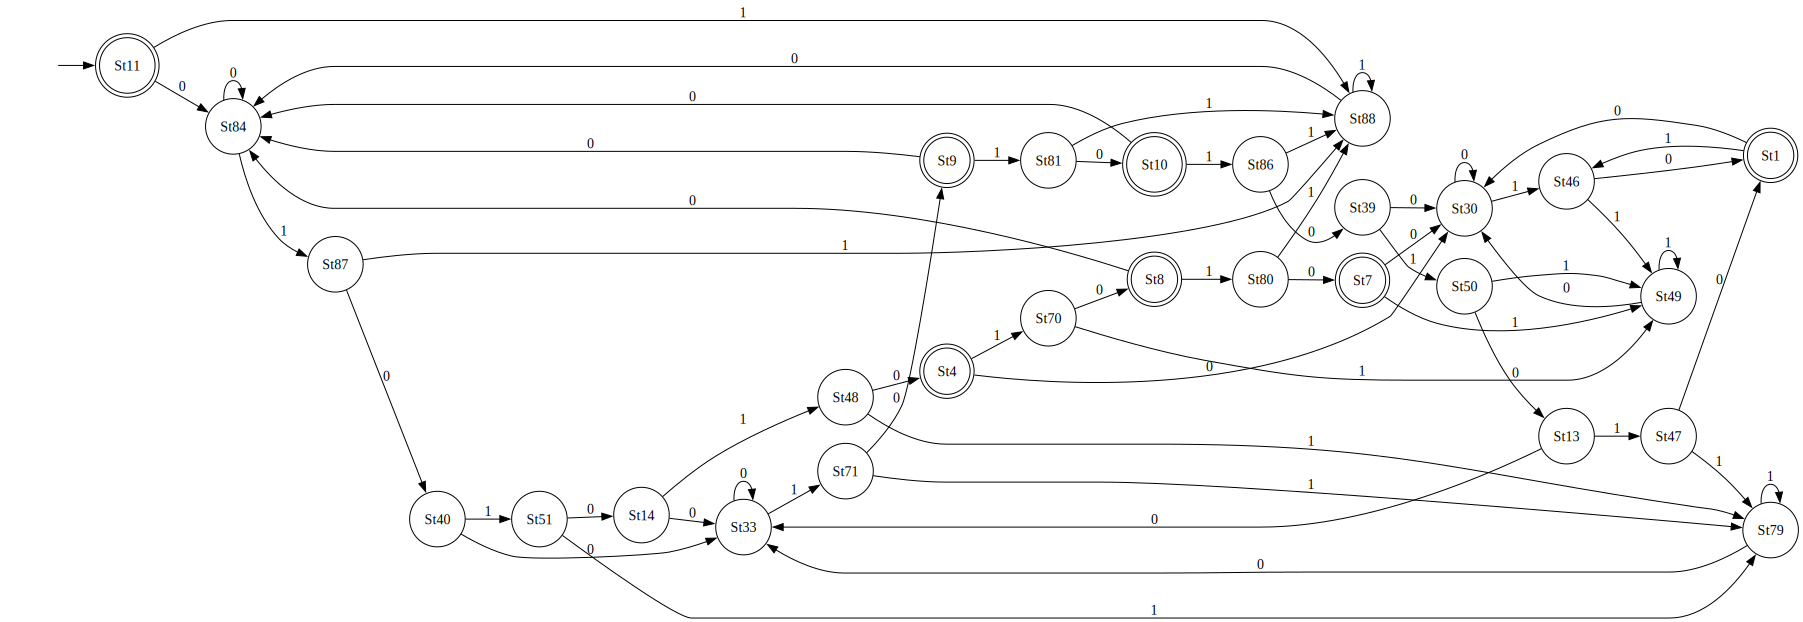

In [52]:
Pattern_010_Min_DFA = min_dfa(DFA_Pattern_010)
dotObj_dfa(Pattern_010_Min_DFA)

### FOR EACH TEST, create this cell below and fill with the test (accepting or rejecting). Document the test.

#### Run the test and show where the machine stop - accepting (green) or rejecting (red).


------------------
------------------



#### Your tests must include these MustPass strings (I'm putting blanks for readability - remove the embedded blanks before running the tests)

* 010   010       
       
* 01     010   101   010  

* 1      010   101   010  

* 110    010   001   010

* 010 1010

*  0101 010 1010 010


#### Extra testing is OK, mark them as such and put them after the "must pass" list.

### *Each test must be put into window that AnimateDFA opens when you run it*

#### Create one copy of the AnimateDFA cells (including the from jove.AnimateDFA import * and display(HTML...) in each cell. Then in that cell, when run, input the test. Run the  test. Submit a "finished" ipynb that captures all the run results.






In [53]:
from jove.AnimateDFA import *
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)
display(HTML('<link rel="stylesheet" href="//stackpath.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.minju.css"/>'))

In [56]:
AnimateDFA(Pattern_010_Min_DFA, FuseEdges=True)


## Your tests must also include these MustFail  (add one more to make three). Blanks added for readability only! A few more than three is OK. Mark it as "extra ones from your side".


### 010    010   010  010 010

### 010010 010   010010  010 1

## 1



# END